In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
# Evaluation metrics
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
# SMOTE and Pipeline to avoid data leakage during cross-validation
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Additional models: XGBoost, LightGBM, CatBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
import time
from tqdm import tqdm

In [4]:
#loading Data
df1=pd.read_csv('/content/drive/MyDrive/Machine Learning 2025/Projects/UK-Accident2018/Accidents_2018.csv')
df2=pd.read_csv('/content/drive/MyDrive/Machine Learning 2025/Projects/UK-Accident2018/Casualties_2018.csv')
df3=pd.read_csv('/content/drive/MyDrive/Machine Learning 2025/Projects/UK-Accident2018/Vehicles_2018.csv')

<ipython-input-4-69c8f04986df>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/content/drive/MyDrive/Machine Learning 2025/Projects/UK-Accident2018/Accidents_2018.csv')
<ipython-input-4-69c8f04986df>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('/content/drive/MyDrive/Machine Learning 2025/Projects/UK-Accident2018/Vehicles_2018.csv')


In [5]:
#check data shape
print('Accidents_2018 data shape is :' , df1.shape)
print('Casualties_2018 data shape is :' ,df2.shape)
print('Vehicles_2018 data shape is :' ,df3.shape)

Accidents_2018 data shape is : (122635, 32)
Casualties_2018 data shape is : (160597, 16)
Vehicles_2018 data shape is : (226409, 23)


In [6]:
#check data for df1
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [7]:
#check data for df2
df2.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [8]:
#check data for df3
df3.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [9]:
#merging all dataset together (merging df1 and df2)
dataFrame=pd.merge(df1,df2,on='Accident_Index')

In [10]:
#check data shape after merging
dataFrame.shape

(140958, 47)

In [11]:
#check data
dataFrame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010130027,523810.0,185730.0,-0.215455,51.556878,1,3,2,1,01/09/2018,...,6,3,0,0,0,0,0,3,1,6
1,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,6,3,0,0,0,2,0,11,1,3
2,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,1,3,0,0,0,2,0,11,1,3
3,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,0,0,0,9,1,4
4,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,2,0,0,9,1,4


In [12]:
#merge 3rd data frame with our data
df=pd.merge(dataFrame,df3,on='Accident_Index')

In [13]:
#checking final data size
df.shape

(270941, 69)

In [14]:
df.head(15)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
5,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
6,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
7,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
8,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,1,18,4,125,1,3,3,1,3
9,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,2,21,5,1240,1,10,4,1,4


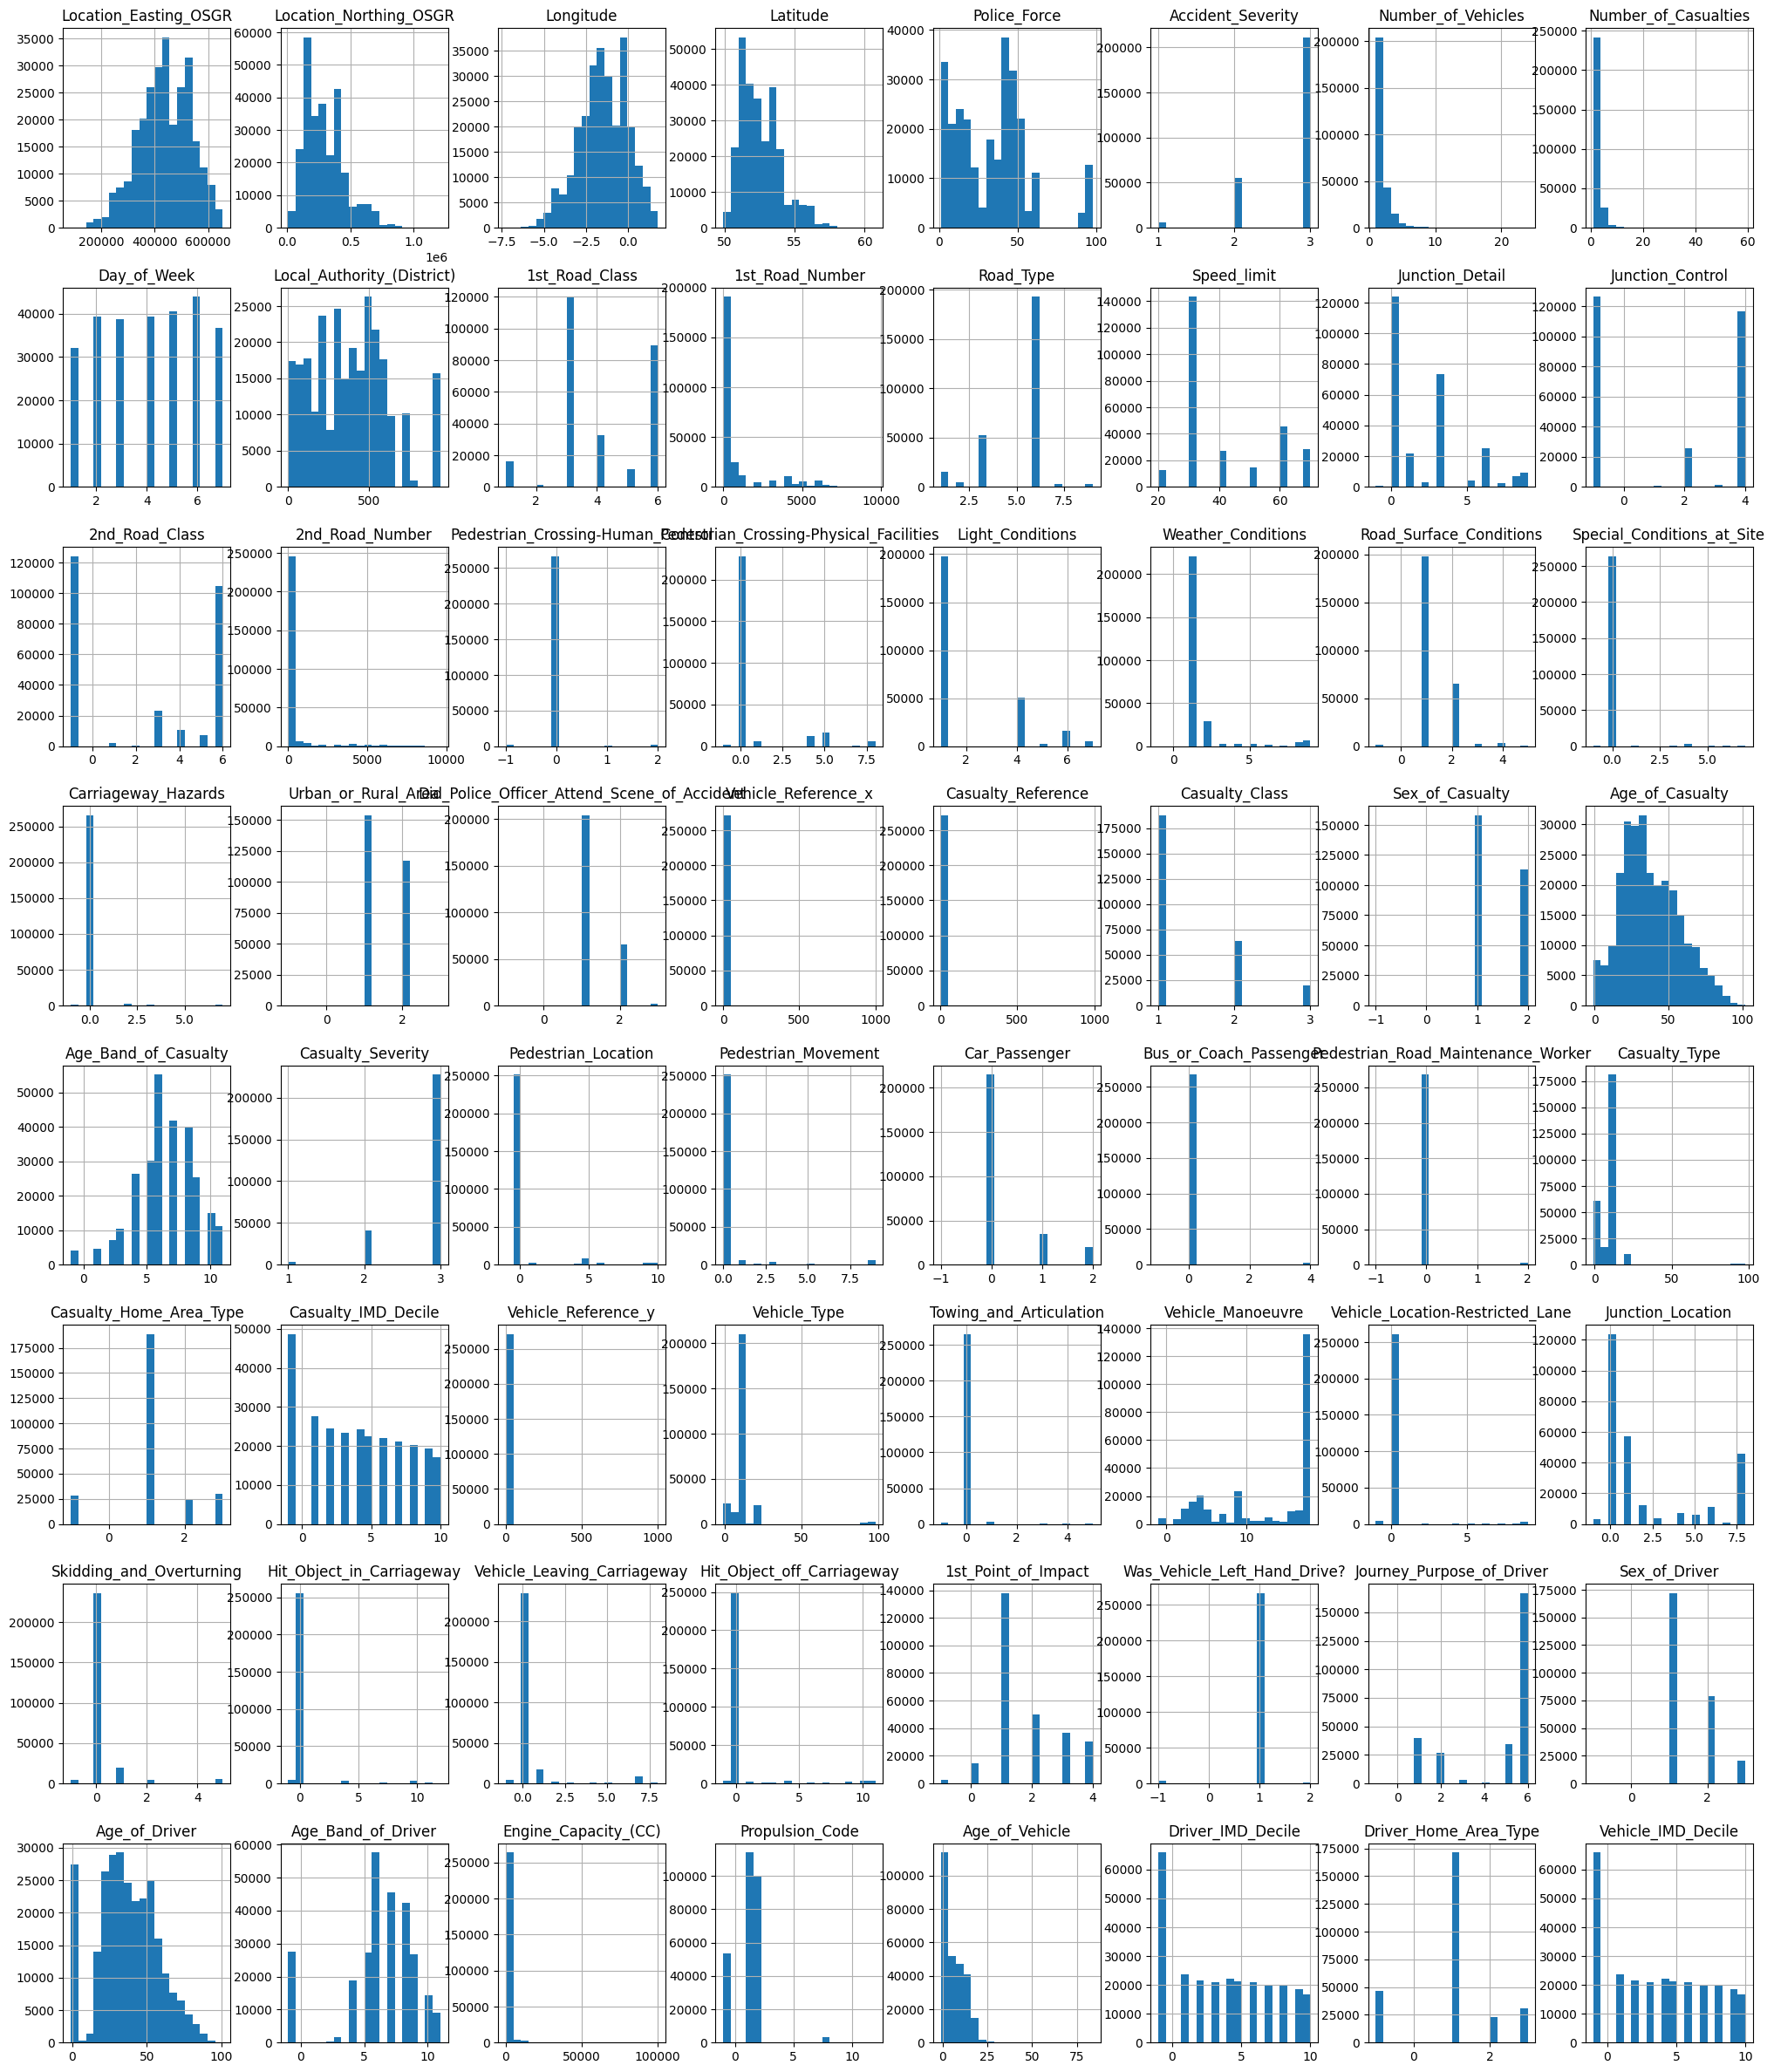

In [15]:
df.hist(bins=20, figsize=(25,30))
plt.show()

In [16]:
#checking full information about combined data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270941 entries, 0 to 270940
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270941 non-null  object 
 1   Location_Easting_OSGR                        270821 non-null  float64
 2   Location_Northing_OSGR                       270821 non-null  float64
 3   Longitude                                    270821 non-null  float64
 4   Latitude                                     270821 non-null  float64
 5   Police_Force                                 270941 non-null  int64  
 6   Accident_Severity                            270941 non-null  int64  
 7   Number_of_Vehicles                           270941 non-null  int64  
 8   Number_of_Casualties                         270941 non-null  int64  
 9   Date                                         270941 non-nul

In [17]:
#soring columns according to numbers of nulls
df.isnull().sum().sort_values(ascending = False).head(15)

,0
LSOA_of_Accident_Location,15762
Longitude,120
Location_Northing_OSGR,120
Latitude,120
Location_Easting_OSGR,120
Time,34
Accident_Index,0
Number_of_Vehicles,0
Police_Force,0
Number_of_Casualties,0


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
#df.drop_duplicates(inplace=True)

In [20]:
#dropping LSOA_of_Accident_Location columns as it has many nulls and it is not important
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)

In [21]:
#dropping null cells only in below columns
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)

In [22]:
##dropping null cells only in time columns
df.dropna(subset=['Time'],axis=0,inplace=True)

In [23]:
#checking nulls again after our null dropping at all data ... now zero null
df.isnull().values.any()

np.False_

In [24]:
#checking all nulls value in our data
df.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
...,...
Propulsion_Code,0
Age_of_Vehicle,0
Driver_IMD_Decile,0
Driver_Home_Area_Type,0


In [25]:
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)

<ipython-input-25-cbf4f00a502c>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [26]:
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute
df.drop(['Date_Time'], axis=1, inplace=True)

In [27]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Year,Month,Day,Hour,Minute
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,3,...,1,-1,8,2,8,2018,9,25,12,15
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,3,...,1,16,-1,-1,-1,2018,9,25,12,15
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,6,...,-1,-1,-1,-1,-1,2018,9,7,11,30
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,5,...,2,1,1,1,1,2018,9,27,8,0
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,4,...,1,8,10,1,10,2018,9,26,19,50


In [28]:
#checking again data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270787 entries, 0 to 270940
Data columns (total 71 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270787 non-null  object 
 1   Location_Easting_OSGR                        270787 non-null  float64
 2   Location_Northing_OSGR                       270787 non-null  float64
 3   Longitude                                    270787 non-null  float64
 4   Latitude                                     270787 non-null  float64
 5   Police_Force                                 270787 non-null  int64  
 6   Accident_Severity                            270787 non-null  int64  
 7   Number_of_Vehicles                           270787 non-null  int64  
 8   Number_of_Casualties                         270787 non-null  int64  
 9   Day_of_Week                                  270787 non-null  in

In [29]:
#checking label vaules
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3,210795
2,54656
1,5336


In [30]:
#renaming accident severity values
df['Accident_Severity']=df['Accident_Severity'].replace({1:'low' , 2 : 'medium' , 3 :'high'})

In [31]:
#checking label vaules
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
high,210795
medium,54656
low,5336


# EDA

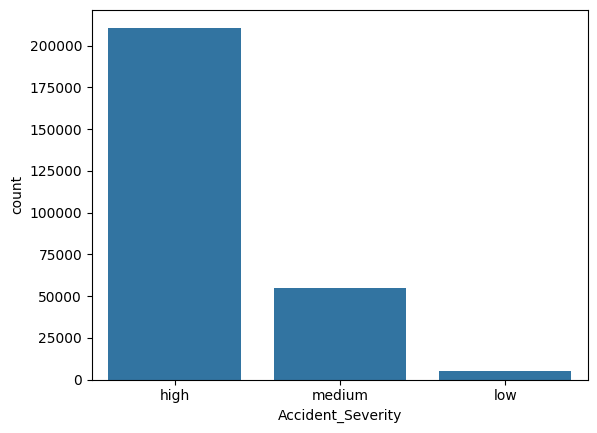

In [32]:
sns.countplot(x = 'Accident_Severity',
              data = df,
              order = df.Accident_Severity.value_counts().index);

In [33]:
#dropping not important columns
df.drop(['Local_Authority_(Highway)', 'Accident_Index'],axis=1,inplace=True)

In [34]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference_x', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casu

In [35]:
df['Speed_limit'].unique()

array([30, 20, 40, 50, 70, 60])

<Axes: xlabel='Speed_limit', ylabel='count'>

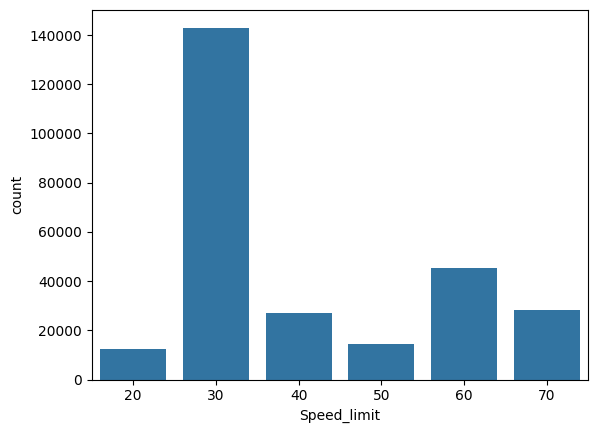

In [36]:
sns.countplot(x = 'Speed_limit' ,data=df)

In [37]:
df['Was_Vehicle_Left_Hand_Drive?'].unique()

array([-1,  1,  2])

<Axes: xlabel='Was_Vehicle_Left_Hand_Drive?', ylabel='count'>

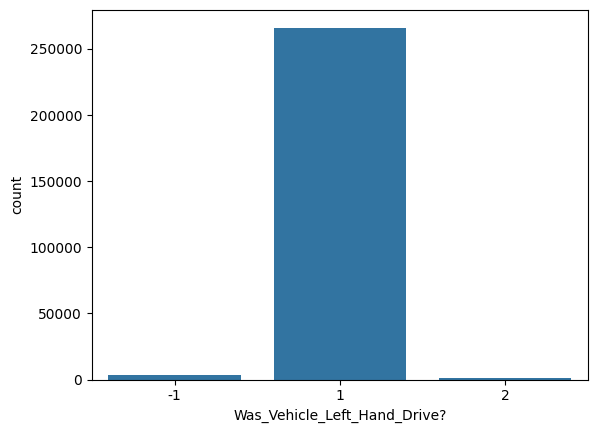

In [38]:
sns.countplot(x = 'Was_Vehicle_Left_Hand_Drive?' ,data=df)

<Axes: xlabel='Was_Vehicle_Left_Hand_Drive?', ylabel='count'>

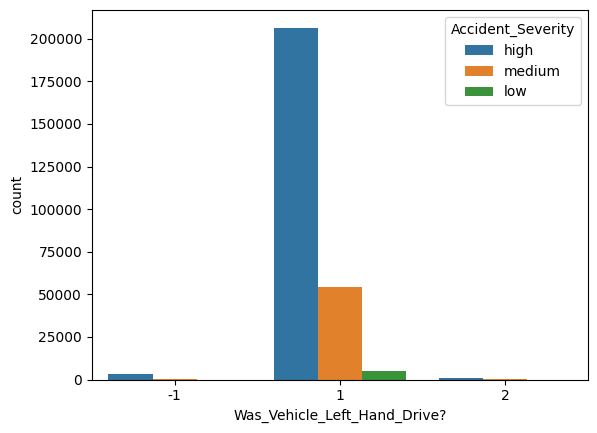

In [39]:
sns.countplot(x = 'Was_Vehicle_Left_Hand_Drive?',hue='Accident_Severity' ,data=df)

<Axes: xlabel='Did_Police_Officer_Attend_Scene_of_Accident', ylabel='count'>

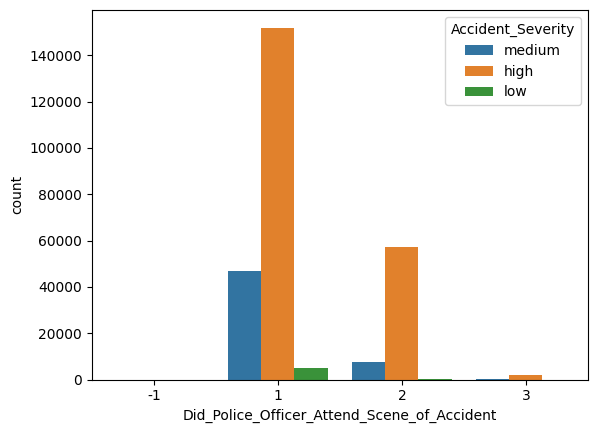

In [40]:
sns.countplot(x = 'Did_Police_Officer_Attend_Scene_of_Accident',hue='Accident_Severity' ,data=df)

<Axes: xlabel='Sex_of_Driver', ylabel='count'>

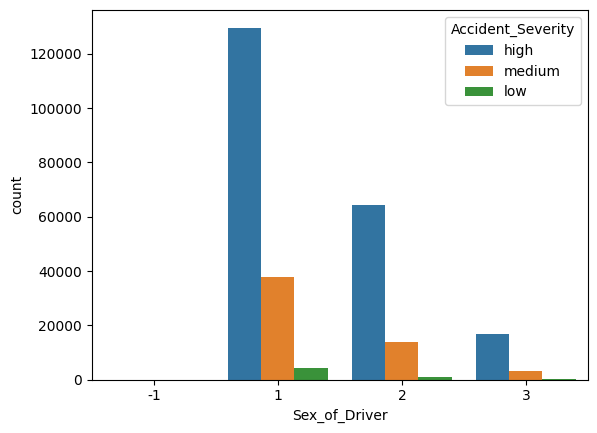

In [41]:
sns.countplot(x = 'Sex_of_Driver',hue='Accident_Severity' ,data=df)

<Axes: xlabel='Age_of_Driver', ylabel='Count'>

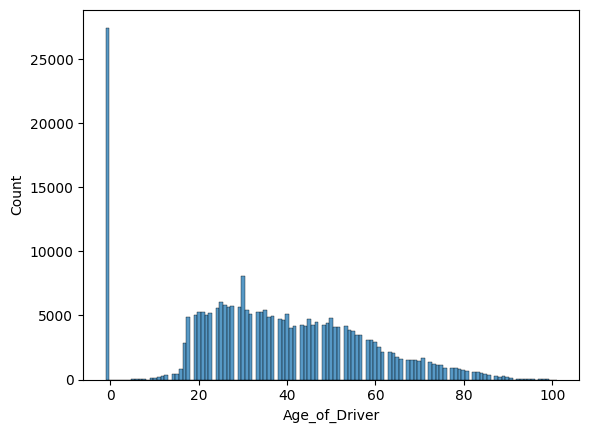

In [42]:
sns.histplot(x = 'Age_of_Driver' ,data=df)

<Axes: xlabel='Age_Band_of_Casualty', ylabel='Count'>

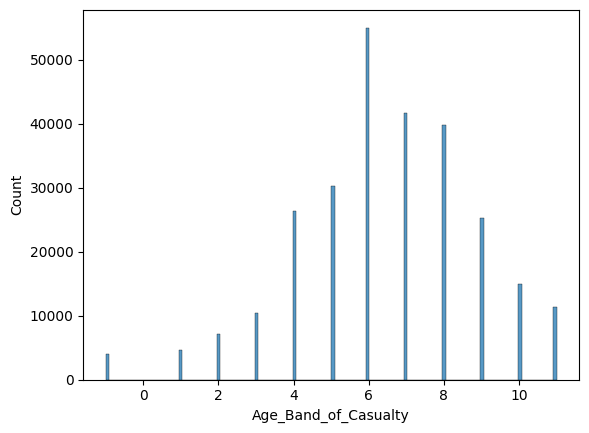

In [43]:
sns.histplot(x = 'Age_Band_of_Casualty' ,data=df)

<Axes: xlabel='Location_Easting_OSGR', ylabel='Count'>

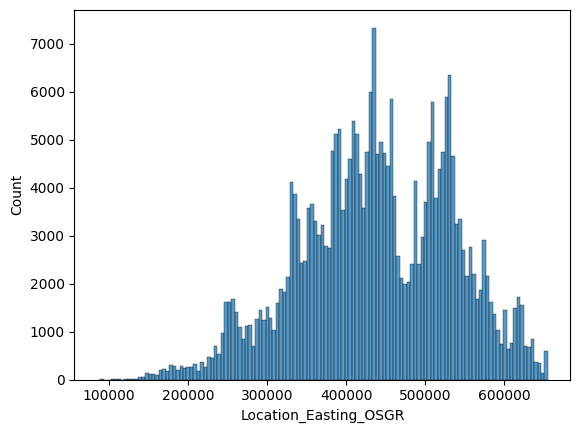

In [44]:
sns.histplot(x = 'Location_Easting_OSGR' ,data=df)

<Axes: xlabel='Age_Band_of_Casualty', ylabel='Count'>

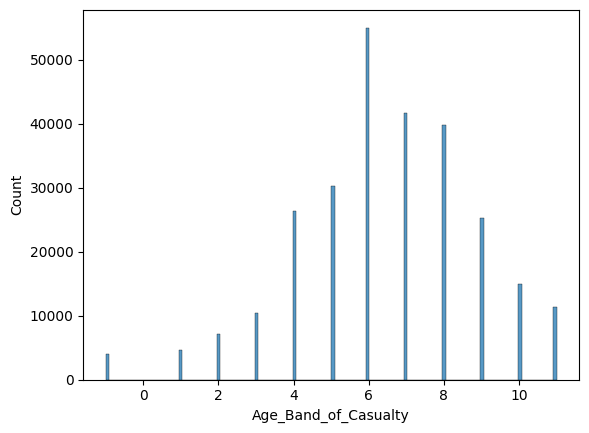

In [45]:
sns.histplot(x = 'Age_Band_of_Casualty' ,data=df)

<Axes: xlabel='Location_Northing_OSGR', ylabel='Count'>

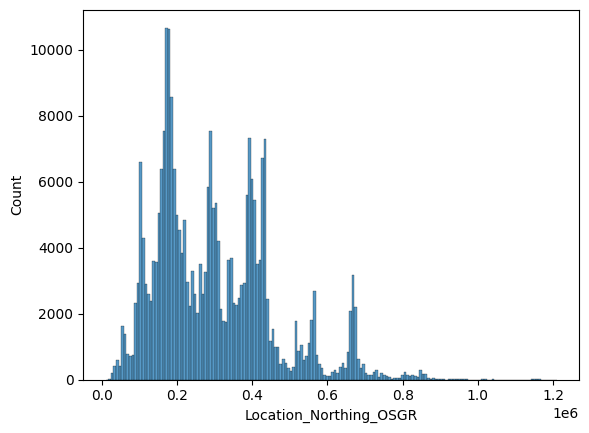

In [46]:
sns.histplot(x = 'Location_Northing_OSGR' ,data=df)

<Axes: xlabel='Longitude', ylabel='Count'>

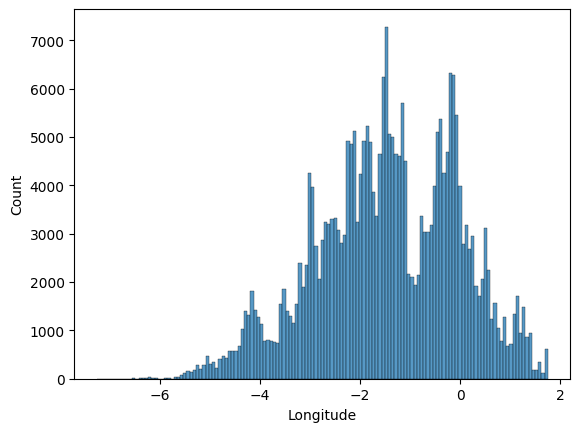

In [47]:
sns.histplot(x = 'Longitude' ,data=df)

<Axes: xlabel='Bus_or_Coach_Passenger', ylabel='count'>

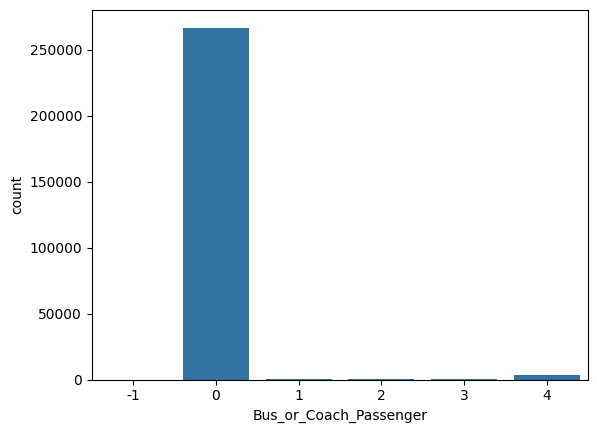

In [48]:
sns.countplot(x = 'Bus_or_Coach_Passenger',data=df)

In [49]:
#checking accident severity values
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
high,210795
medium,54656
low,5336


In [66]:
#checking null vales again
df.isnull().values.any()

np.False_

In [67]:
#splitting data to input and output
X=df.drop('Accident_Severity',axis=1) #input
y=df['Accident_Severity']  #output(label)

In [68]:
y.unique()

array(['high', 'medium', 'low'], dtype=object)

In [69]:
#renaming accident severity values
y=y.replace({'low' : 0,  'medium' : 1 , 'high' : 2})

<ipython-input-69-c6ed87f5dd70>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace({'low' : 0,  'medium' : 1 , 'high' : 2})


In [70]:
print(X.shape)
print(y.shape)

(270787, 68)
(270787,)


In [71]:
#using standerscaler technique to scale all input data to be with the same scale
from sklearn.preprocessing import StandardScaler # importing module
scaler = StandardScaler()   #making function
X=scaler.fit_transform(X)    #scalling input data

In [72]:
#splitting all data to train data and test data
from sklearn.model_selection import train_test_split   # importing module
#data splitting with 80% train and 20% test and shuffle it
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)

In [73]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (216629, 68)
 y_train.shape :  (216629,)
 X_test.shape :  (54158, 68)
 y_test.shape :  (54158,)


# Machine Learning Models & Evaluation

In [74]:
# Dictionary of models with additional models
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1, random_state=0),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
    #'Support Vector Machine': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=0),
    'Extra Trees': ExtraTreesClassifier(n_jobs=-1, random_state=0),
    'Bagging': BaggingClassifier(n_jobs=-1, random_state=0),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=0),
    'AdaBoosting': AdaBoostClassifier(random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=0),
    'LightGBM': LGBMClassifier(random_state=0,verbose=0),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=0,iterations=1000),
}

In [80]:
def train_ML_algorithms(X_train, X_test, y_train, y_test, models,Balanced=False, cv=5, random_state=42):
    """
    Split the data into training and test sets, train ML models using cross-validation on the training set
    (with SMOTE applied only within each fold), and record performance metrics for both training and test sets.
    Also captures probability predictions when available.
    """

    results = []
    models_name = []
    predictions_dict = {}

    for name, model in tqdm(models.items()):
        # Create a pipeline that applies SMOTE and then the classifier.
        if Balanced :
            pipeline = Pipeline([
                ('smote', SMOTE(random_state=random_state)),
                ('clf', model)
            ])
        else:
            pipeline = Pipeline([
                ('clf', model)
            ])
        if cv != 0:
            # Set up stratified k-fold cross-validation on the training split.
            skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

            # Compute cross-validation accuracy scores on the training data using the pipeline.
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1_weighted')
            cv_accuracy = round(np.mean(cv_scores) * 100, 1)
        else:
            pipeline.fit(X_train, y_train)
            y_test_pred = pipeline.predict(X_test)
            cv_accuracy = round(f1_score(y_test, y_test_pred, average='weighted') * 100, 1)

        # Time the training process on training data using the pipeline.
        train_start_time = time.time()
        pipeline.fit(X_train, y_train)
        train_end_time = time.time()
        training_time = train_end_time - train_start_time

        # Make predictions on the training set.
        y_train_pred = pipeline.predict(X_train)
        # Make predictions on the test set and record prediction time.
        test_pred_start_time = time.time()
        y_test_pred = pipeline.predict(X_test)
        test_pred_end_time = time.time()
        test_pred_time = test_pred_end_time - test_pred_start_time

        # Initialize prediction dictionary.
        pred_dict = {
            "y_train": y_train,
            "y_test": y_test,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        }

        # Try to get prediction probabilities if available.
        try:
            y_train_proba = pipeline.predict_proba(X_train)
            y_test_proba = pipeline.predict_proba(X_test)
            pred_dict["y_train_proba"] = y_train_proba
            pred_dict["y_test_proba"] = y_test_proba
        except (AttributeError, NotImplementedError):
            # Some models don't have predict_proba.
            pass

        # Save predictions for both training and test sets.
        predictions_dict[name] = pred_dict

        # Calculate performance metrics.
        accuracy_train = round(accuracy_score(y_train, y_train_pred)* 100, 1)
        precision_train = round(precision_score(y_train, y_train_pred, average='weighted')* 100, 1)
        recall_train = round(recall_score(y_train, y_train_pred, average='weighted')* 100, 1)
        f1_train = round(f1_score(y_train, y_train_pred, average='weighted')* 100, 1)

        accuracy_test = round(accuracy_score(y_test, y_test_pred)* 100, 3)
        precision_test = round(precision_score(y_test, y_test_pred, average='weighted')* 100, 1)
        recall_test = round(recall_score(y_test, y_test_pred, average='weighted')* 100, 1)
        f1_test = round(f1_score(y_test, y_test_pred, average='weighted')* 100, 1)

        models_name.append(name)
        results.append([
            cv_accuracy,
            accuracy_train, accuracy_test,
            precision_train, precision_test,
            recall_train, recall_test,
            f1_train, f1_test,
            training_time, test_pred_time
        ])

        print(f"\n{name}: CV F1_Score = {cv_accuracy:.2f}%, Train Acc = {accuracy_train:.2f}%, Test Acc = {accuracy_test:.2f}%")

    # Create a DataFrame to summarize model performance.
    Model_accuracy = pd.DataFrame(
        results,
        index=models_name,
        columns=[
            'CV F1_Score',
            'Train Accuracy', 'Test Accuracy',
            'Train Precision', 'Test Precision',
            'Train Recall', 'Test Recall',
            'Train F1 Score', 'Test F1 Score',
            'Training Time (s)', 'Test Prediction Time (s)'
        ]
    )

    return Model_accuracy, predictions_dict

In [81]:
def calculate_confidence_metrics(predictions_dict, threshold=0.7):
    """
    Calculate confidence metrics for each model based on prediction probabilities.
    Handles models that don't support predict_proba.

    Parameters:
        predictions_dict (dict): Dictionary containing predictions and probabilities
        threshold (float): Confidence threshold for high-confidence predictions

    Returns:
        pd.DataFrame: DataFrame with confidence metrics for each model
    """
    confidence_results = {}

    for model_name, pred_data in predictions_dict.items():
        metrics = {}

        # Check if probability data is available
        if "y_train_proba" in pred_data and "y_test_proba" in pred_data:
            # Training set confidence metrics
            train_proba = pred_data["y_train_proba"]
            train_max_proba = np.max(train_proba, axis=1)

            metrics["train_avg_confidence"] = round(np.mean(train_max_proba), 3)
            metrics["train_median_confidence"] = round(np.median(train_max_proba), 3)
            metrics["train_high_confidence_ratio"] = round(np.mean(train_max_proba >= threshold), 3)

            # Calculate confidence-weighted accuracy for training
            y_train = pred_data["y_train"]
            y_train_pred = pred_data["y_train_pred"]
            correct_train = (y_train == y_train_pred)
            metrics["train_confidence_weighted_accuracy"] = round(np.sum(correct_train * train_max_proba) / np.sum(train_max_proba), 3)

            # Test set confidence metrics
            test_proba = pred_data["y_test_proba"]
            test_max_proba = np.max(test_proba, axis=1)

            metrics["test_avg_confidence"] = round(np.mean(test_max_proba), 3)
            metrics["test_median_confidence"] = round(np.median(test_max_proba), 3)
            metrics["test_high_confidence_ratio"] = round(np.mean(test_max_proba >= threshold), 3)

            # Calculate confidence-weighted accuracy for test
            y_test = pred_data["y_test"]
            y_test_pred = pred_data["y_test_pred"]
            correct_test = (y_test == y_test_pred)
            metrics["test_confidence_weighted_accuracy"] = round(np.sum(correct_test * test_max_proba) / np.sum(test_max_proba), 3)
        else:
            # For models without predict_proba, use placeholder values
            metrics["train_avg_confidence"] = np.nan
            metrics["train_median_confidence"] = np.nan
            metrics["train_high_confidence_ratio"] = np.nan
            metrics["train_confidence_weighted_accuracy"] = np.nan
            metrics["test_avg_confidence"] = np.nan
            metrics["test_median_confidence"] = np.nan
            metrics["test_high_confidence_ratio"] = np.nan
            metrics["test_confidence_weighted_accuracy"] = np.nan

        confidence_results[model_name] = metrics

    # Convert to DataFrame
    conf_df = pd.DataFrame.from_dict(confidence_results, orient='index')

    return conf_df

In [82]:
def plot_models_accuracy_scores(Model_accuracy):
    """
    Enhanced visualization of model performance metrics with improved visual layout.

    Parameters:
        Model_accuracy (pd.DataFrame): DataFrame containing metrics for each model.

    Returns:
        None
    """

    # ============== Time Performance Visualization ==============
    fig, ax = plt.subplots(figsize=(12, 8))
    time_metrics = ['Training Time (s)', 'Test Prediction Time (s)']
    time_data = Model_accuracy[time_metrics]

    # Plot with logarithmic scale for better visibility
    time_data.plot(kind='bar', ax=ax, logy=True, width=0.8)

    # Customize plot
    plt.title('Model Computational Efficiency (Log Scale)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Seconds (log scale)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Time Metrics')

    # Value annotations
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge',
                    padding=3, fontsize=8, rotation=90)

    plt.tight_layout()
    plt.show()

    # ============== Performance Metrics Comparison ==============
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    for idx, metric in enumerate(metrics):
        ax = axs[idx//2, idx%2]
        sorted_models = Model_accuracy.sort_values(f'Test {metric}', ascending=False)

        # Horizontal position
        y_pos = np.arange(len(sorted_models))
        bar_height = 0.4

        # Plot train/test comparison
        train_bars = ax.barh(y_pos - bar_height/2, sorted_models[f'Train {metric}'],
                            height=bar_height, color='#1f77b4', label='Train')
        test_bars = ax.barh(y_pos + bar_height/2, sorted_models[f'Test {metric}'],
                           height=bar_height, color='#ff7f0e', label='Test')

        # Customize subplot
        ax.set_title(f'{metric} Comparison', fontsize=13)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(sorted_models.index)
        ax.set_xlim(0, 105)
        ax.grid(axis='x', alpha=0.4)

        # Annotate values
        for bars in [train_bars, test_bars]:
            for bar in bars:
                width = bar.get_width()
                ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                       f'{width:.1f}', va='center', fontsize=9)

        if idx == 0:  # Only show legend once
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.suptitle('Model Performance Metrics Comparison', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    # ============== Compact Metric Overview ==============
    plt.figure(figsize=(14, 8))

    # Prepare data for combined metric visualization
    test_metrics = Model_accuracy[['Test Accuracy', 'Test Precision',
                                  'Test Recall', 'Test F1 Score']]
    train_metrics = Model_accuracy[['Train Accuracy', 'Train Precision',
                                   'Train Recall', 'Train F1 Score']]

    # Sort by test accuracy
    sorted_models = test_metrics.sort_values('Test Accuracy', ascending=False)

    # Plot all metrics in compact view
    x_pos = np.arange(len(sorted_models))
    for i, col in enumerate(test_metrics.columns):
        plt.plot(x_pos, sorted_models[col],
                marker='o', linestyle='--',
                label=col.replace('Test ', ''))

    plt.title('Combined Test Metric Trends', fontsize=14)
    plt.xlabel('Models (sorted by test accuracy)')
    plt.ylabel('Score')
    plt.xticks(x_pos, sorted_models.index, rotation=45, ha='right')
    plt.ylim(0, 102)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


In [83]:
def display_metrics(predictions_dict, class_names, best_model_name=None):
    models_to_evaluate = [best_model_name] if best_model_name else predictions_dict.keys()
    num_classes = len(class_names)

    for model_name in models_to_evaluate:
        preds = predictions_dict[model_name]
        print(f"\n=== Metrics for Model: {model_name} ===")

        for split in ["train", "test"]:
            y_true = preds[f"y_{split}"]
            y_pred = preds[f"y_{split}_pred"]
            y_proba_key = f"y_{split}_proba"
            has_proba = y_proba_key in preds

            print(f"\n{split.capitalize()} Metrics:")
            print("Classification Report:")
            print(classification_report(y_true, y_pred, target_names=class_names))

            fig, axes = plt.subplots(1, 3, figsize=(20, 5))

            # Raw Confusion Matrix
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0],
                        xticklabels=class_names, yticklabels=class_names)
            axes[0].set_title(f"{split.capitalize()} Confusion Matrix")
            axes[0].set_xlabel("Predicted")
            axes[0].set_ylabel("True")

            # Normalized Confusion Matrix
            cm_norm = confusion_matrix(y_true, y_pred, normalize="true")
            sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", ax=axes[1],
                        xticklabels=class_names, yticklabels=class_names)
            axes[1].set_title(f"{split.capitalize()} Confusion Matrix (Normalized)")
            axes[1].set_xlabel("Predicted")
            axes[1].set_ylabel("True")

            # ROC Curve
            ax_roc = axes[2]
            if has_proba:
                y_score = preds[y_proba_key]
                try:
                    if num_classes == 2:
                        fpr, tpr, _ = roc_curve(y_true, y_score[:, 1])
                        auc_score = roc_auc_score(y_true, y_score[:, 1])
                        ax_roc.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
                        ax_roc.plot([0, 1], [0, 1], "k--")
                    else:
                        # Multi-class
                        y_true_bin = label_binarize(y_true, classes=range(num_classes))
                        auc_score = roc_auc_score(y_true_bin, y_score, average="macro", multi_class="ovr")
                        for i in range(num_classes):
                            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
                            ax_roc.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc_score(y_true_bin[:, i], y_score[:, i]):.2f})")
                        ax_roc.plot([0, 1], [0, 1], "k--")

                    ax_roc.set_title(f"{split.capitalize()} ROC Curve (AUC = {auc_score:.2f})")
                    ax_roc.set_xlabel("False Positive Rate")
                    ax_roc.set_ylabel("True Positive Rate")
                    ax_roc.legend()
                    ax_roc.grid()
                except Exception as e:
                    ax_roc.text(0.5, 0.5, f"Error computing ROC: {e}", ha='center', va='center')
                    ax_roc.axis("off")
            else:
                ax_roc.text(0.5, 0.5, f"No probability scores for {split}", ha='center', va='center')
                ax_roc.axis("off")

            plt.tight_layout()
            plt.show()


In [84]:
Model_accuracy, predictions_dict = train_ML_algorithms(X_train, X_test, y_train, y_test, models,Balanced=False,cv=0)

  9%|▉         | 1/11 [00:18<03:02, 18.29s/it]


Logistic Regression: CV F1_Score = 92.60%, Train Acc = 93.30%, Test Acc = 93.01%


 18%|█▊        | 2/11 [23:55<2:06:13, 841.47s/it]


K Nearest Neighbors: CV F1_Score = 92.90%, Train Acc = 96.20%, Test Acc = 93.31%


 27%|██▋       | 3/11 [24:09<1:01:46, 463.28s/it]


Decision Tree: CV F1_Score = 96.70%, Train Acc = 100.00%, Test Acc = 96.69%


 36%|███▋      | 4/11 [26:56<40:25, 346.55s/it]  


Random Forest: CV F1_Score = 96.60%, Train Acc = 100.00%, Test Acc = 96.73%


 45%|████▌     | 5/11 [29:20<27:19, 273.25s/it]


Extra Trees: CV F1_Score = 96.70%, Train Acc = 100.00%, Test Acc = 96.81%


 55%|█████▍    | 6/11 [30:49<17:33, 210.69s/it]


Bagging: CV F1_Score = 97.50%, Train Acc = 99.90%, Test Acc = 97.59%


 64%|██████▎   | 7/11 [32:10<11:13, 168.32s/it]


Hist Gradient Boosting: CV F1_Score = 94.80%, Train Acc = 95.60%, Test Acc = 95.00%


 73%|███████▎  | 8/11 [33:42<07:12, 144.19s/it]


AdaBoosting: CV F1_Score = 92.80%, Train Acc = 93.60%, Test Acc = 93.33%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:49:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
 82%|████████▏ | 9/11 [34:20<03:41, 110.91s/it]


XGBoost: CV F1_Score = 95.50%, Train Acc = 96.50%, Test Acc = 95.67%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


LightGBM: CV F1_Score = 94.80%, Train Acc = 95.60%, Test Acc = 95.00%


100%|██████████| 11/11 [44:24<00:00, 242.24s/it]


CatBoost: CV F1_Score = 95.50%, Train Acc = 96.40%, Test Acc = 95.64%


## Sort models by Corss Validation F1 Score

In [85]:
Model_accuracy.sort_values(by='CV F1_Score',ascending=False,inplace=True)
Model_accuracy

,CV F1_Score,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Training Time (s),Test Prediction Time (s)
Bagging,97.5,99.9,97.589,99.9,97.6,99.9,97.6,99.9,97.5,40.033243,0.532792
Extra Trees,96.7,100.0,96.806,100.0,96.9,100.0,96.8,100.0,96.7,63.920664,1.793878
Decision Tree,96.7,100.0,96.689,100.0,96.7,100.0,96.7,100.0,96.7,6.051638,0.018944
Random Forest,96.6,100.0,96.728,100.0,96.8,100.0,96.7,100.0,96.6,78.564283,0.962353
XGBoost,95.5,96.5,95.665,96.6,95.8,96.5,95.7,96.4,95.5,16.631250,0.364085
CatBoost,95.5,96.4,95.637,96.5,95.8,96.4,95.6,96.3,95.5,268.918698,1.562386
Hist Gradient Boosting,94.8,95.6,94.996,95.7,95.1,95.6,95.0,95.4,94.8,25.226094,2.718171
LightGBM,94.8,95.6,95.004,95.8,95.2,95.6,95.0,95.4,94.8,18.213622,0.958279
K Nearest Neighbors,92.9,96.2,93.310,96.2,93.2,96.2,93.3,96.0,92.9,0.025099,126.299482
AdaBoosting,92.8,93.6,93.327,93.9,93.6,93.6,93.3,93.1,92.8,42.674791,0.474091


In [86]:
# Calculate the overall average for each model across Train and Test
Model_accuracy["Overall Accuracy"] = Model_accuracy[["Train Accuracy", "Test Accuracy"]].mean(axis=1).round(1)
Model_accuracy["Overall Precision"] = Model_accuracy[["Train Precision", "Test Precision"]].mean(axis=1).round(1)
Model_accuracy["Overall Recall"] = Model_accuracy[["Train Recall", "Test Recall"]].mean(axis=1).round(1)
Model_accuracy["Overall F1 Score"] = Model_accuracy[["Train F1 Score", "Test F1 Score"]].mean(axis=1).round(1)

# Display the updated DataFrame with overall metrics
model_overall = Model_accuracy[["CV F1_Score","Overall Accuracy", "Overall Precision", "Overall Recall", "Overall F1 Score"]]
model_overall

,CV F1_Score,Overall Accuracy,Overall Precision,Overall Recall,Overall F1 Score
Bagging,97.5,98.7,98.8,98.8,98.7
Extra Trees,96.7,98.4,98.4,98.4,98.4
Decision Tree,96.7,98.3,98.4,98.4,98.4
Random Forest,96.6,98.4,98.4,98.4,98.3
XGBoost,95.5,96.1,96.2,96.1,96.0
CatBoost,95.5,96.0,96.2,96.0,95.9
Hist Gradient Boosting,94.8,95.3,95.4,95.3,95.1
LightGBM,94.8,95.3,95.5,95.3,95.1
K Nearest Neighbors,92.9,94.8,94.7,94.8,94.4
AdaBoosting,92.8,93.5,93.8,93.4,92.9


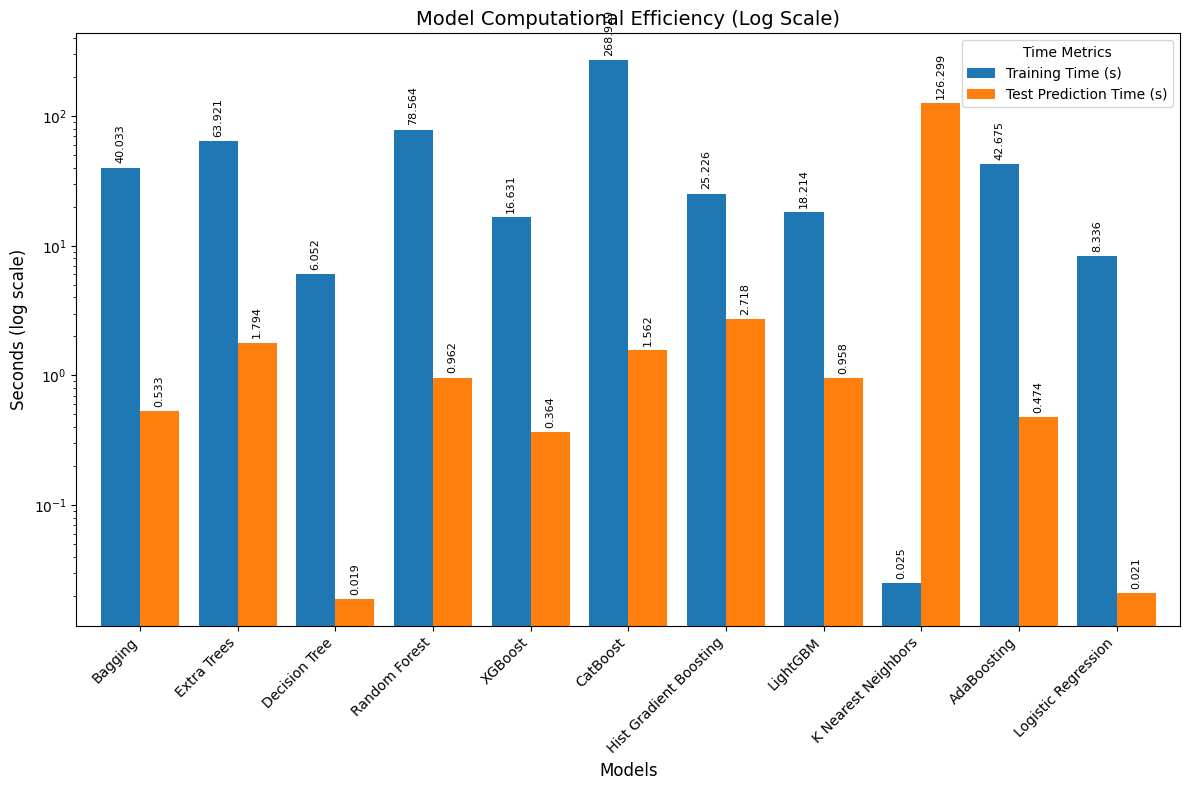

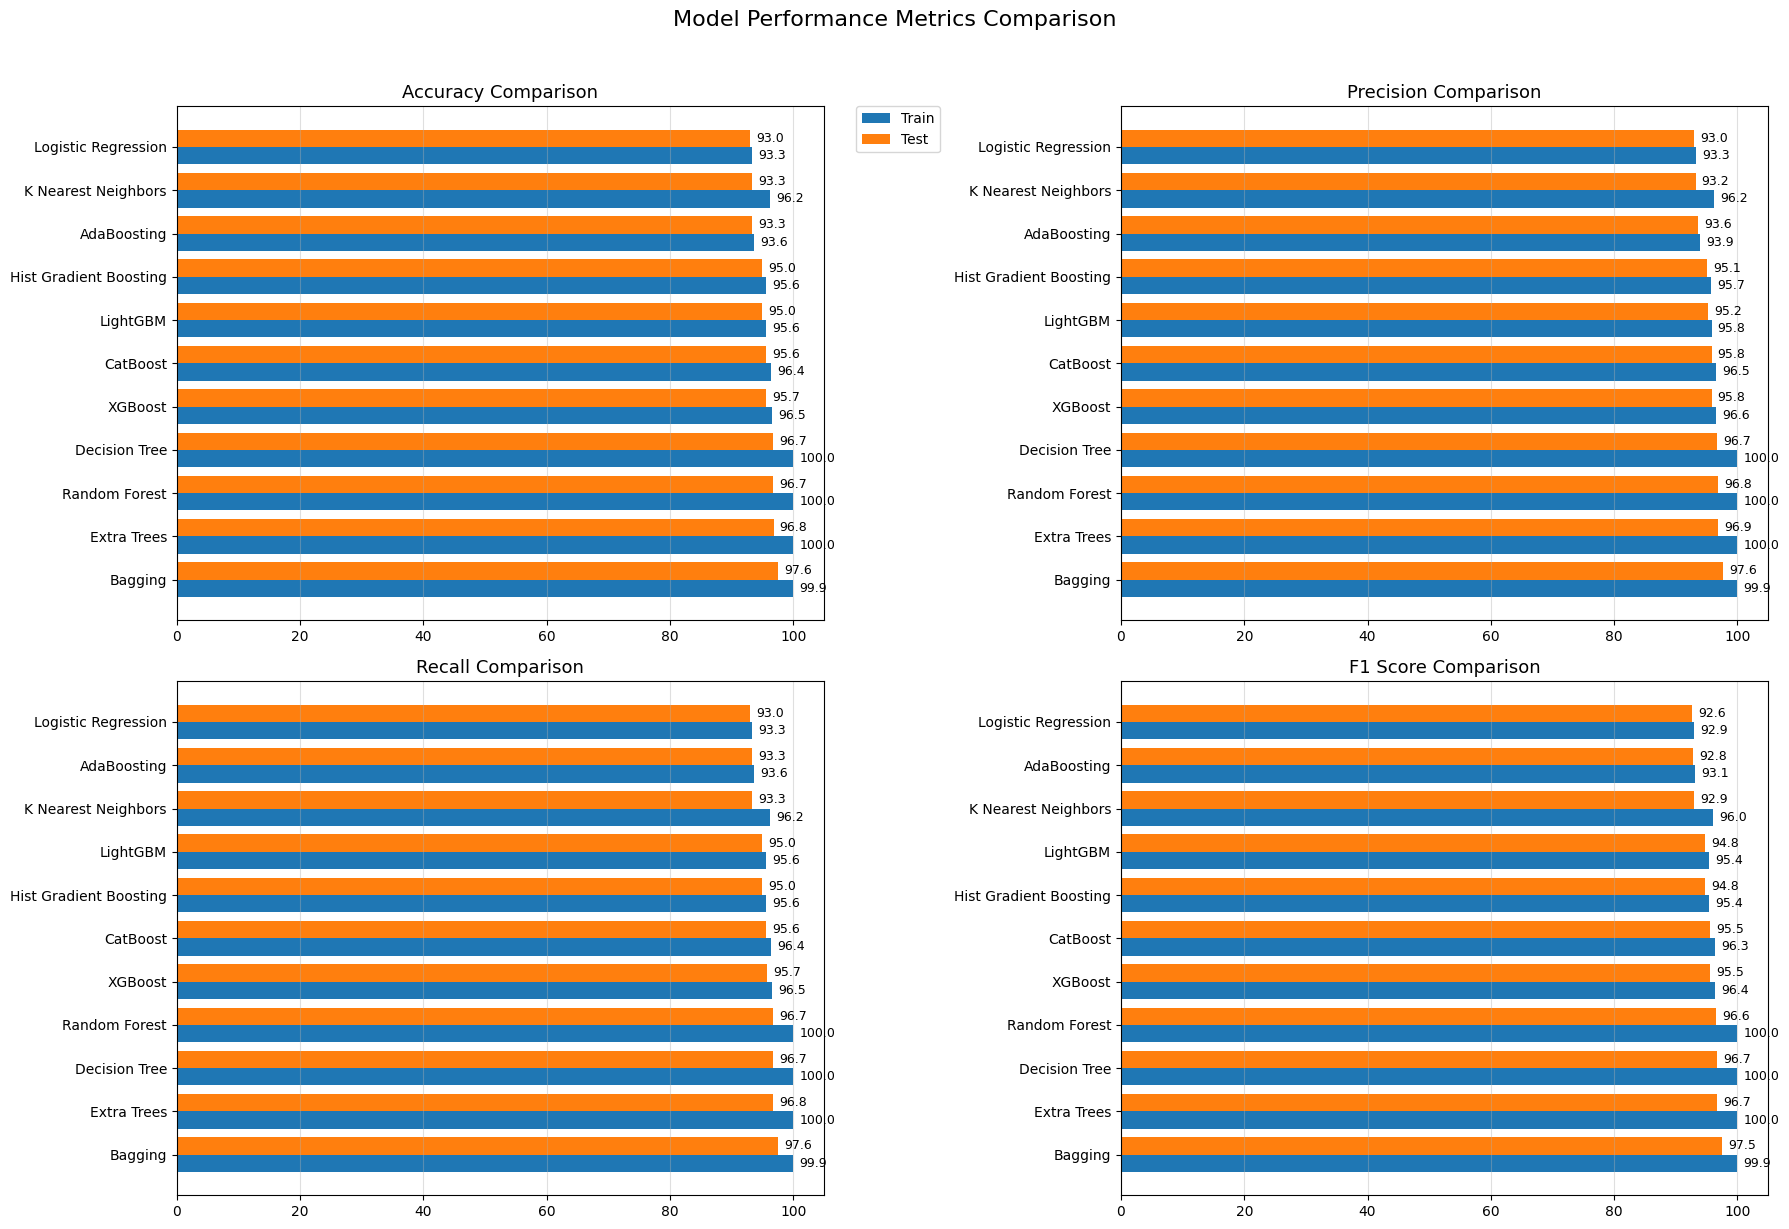

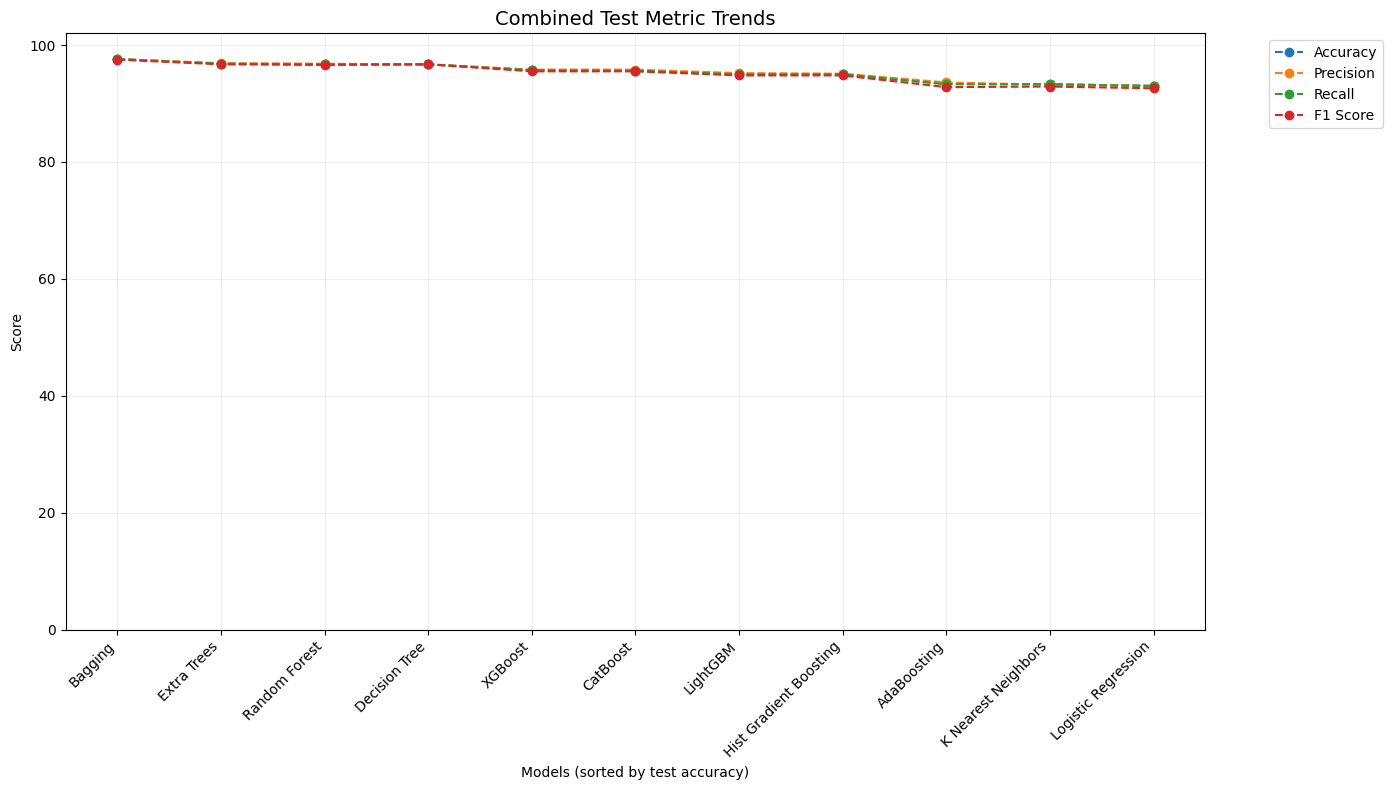

In [87]:
plot_models_accuracy_scores(Model_accuracy)


=== Metrics for Model: Bagging ===

Train Metrics:
Classification Report:
              precision    recall  f1-score   support

         low       1.00      0.99      1.00      4269
      medium       1.00      1.00      1.00     43725
        high       1.00      1.00      1.00    168635

    accuracy                           1.00    216629
   macro avg       1.00      1.00      1.00    216629
weighted avg       1.00      1.00      1.00    216629



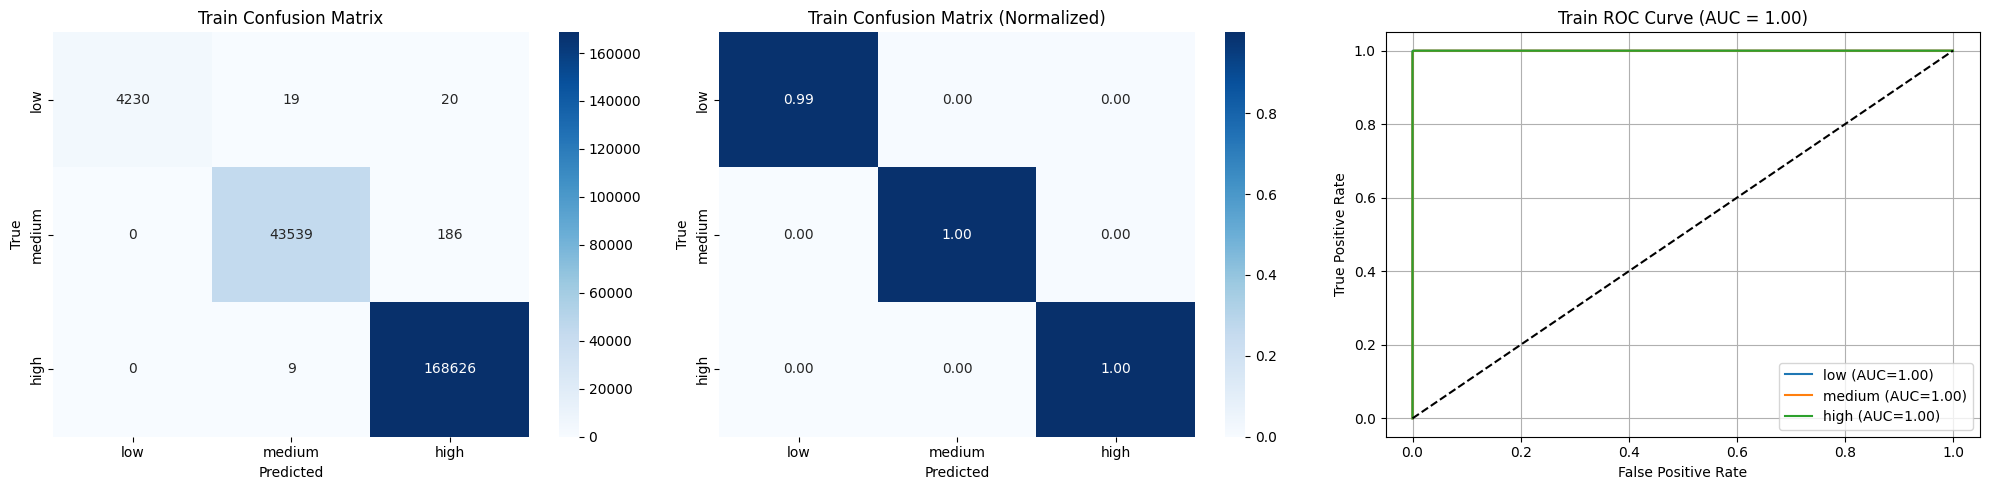


Test Metrics:
Classification Report:
              precision    recall  f1-score   support

         low       1.00      0.84      0.91      1067
      medium       0.98      0.91      0.94     10931
        high       0.97      1.00      0.99     42160

    accuracy                           0.98     54158
   macro avg       0.98      0.92      0.95     54158
weighted avg       0.98      0.98      0.98     54158



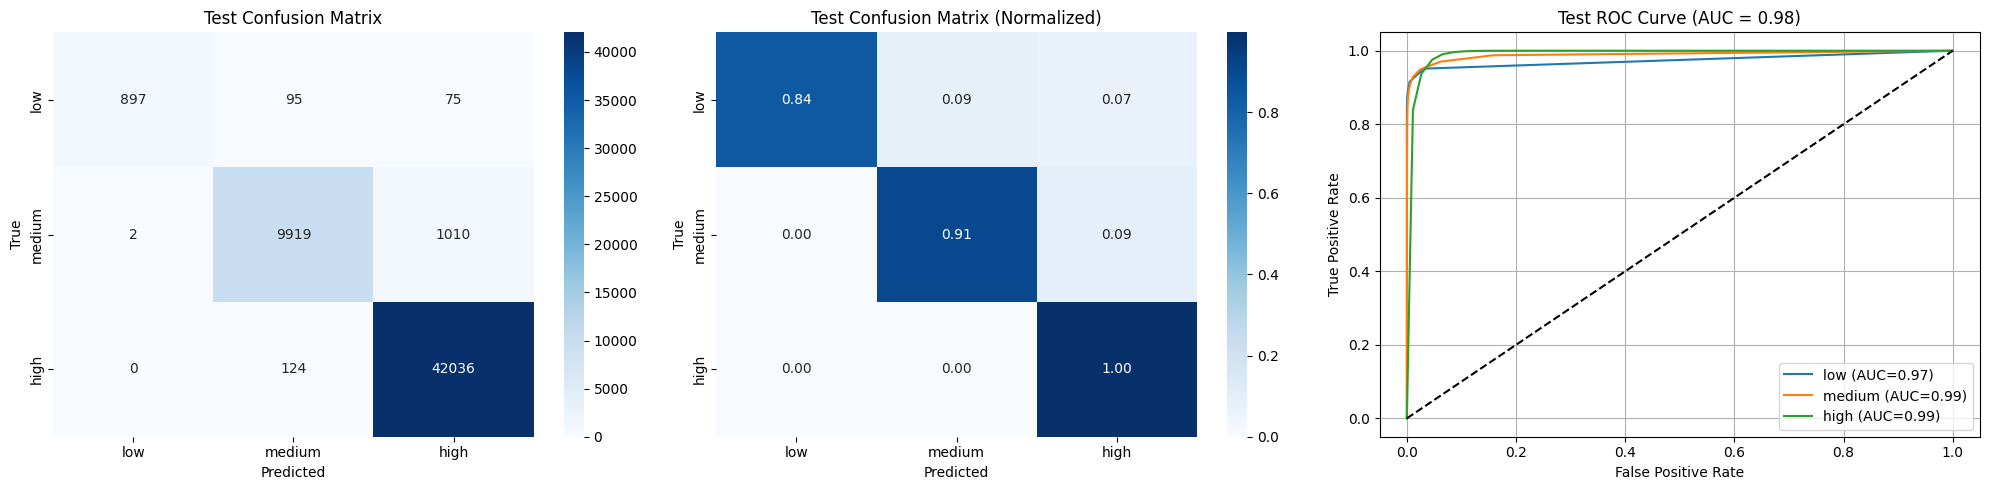

In [88]:
display_metrics(predictions_dict,class_names=['low' ,  'medium' , 'high' ], best_model_name=Model_accuracy.index[0])

In [1]:
Model_accuracy.to_csv('models accuracy.csv')

In [1]:
# Example usage after getting predictions_dict:
confidence_results = calculate_confidence_metrics(predictions_dict)

# Convert to DataFrame for easier viewing and saving
conf_df_rows = []
for model_name, metrics in confidence_results.items():
    metrics_row = {"Model": model_name}
    metrics_row.update(metrics)
    conf_df_rows.append(metrics_row)

confidence_df = pd.DataFrame(conf_df_rows)
confidence_df.set_index("Model", inplace=True)

# Print and save results

confidence_df.to_csv("model_confidence_metrics Scaling.csv")
confidence_df